
#Data Set: Early stage diabetes risk prediction dataset  

---





dataset available here:
[https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.](https://archive.ics.uci.edu/ml/datasets/Early+stage+diabetes+risk+prediction+dataset.)

In [3578]:
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

In [3579]:
# Input the data from the URL.
data = "https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv"
!wget $data # Get the data.

--2022-11-11 03:19:19--  https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34682 (34K) [application/x-httpd-php]
Saving to: ‘diabetes_data_upload.csv.51’

diabetes_data_uploa 100%[===================>]  33.87K  --.-KB/s    in 0.06s   

2022-11-11 03:19:19 (523 KB/s) - ‘diabetes_data_upload.csv.51’ saved [34682/34682]



In [3580]:
df = pd.read_csv('diabetes_data_upload.csv')


#1. Data Cleanup and EDA

In [3581]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


We can see we have only one numerical category (age), the rest are categorical. Let's see how many rows of data we have, along with how many columns (features) we have for each:

In [3582]:
df.shape

(520, 17)

In [3583]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [3584]:
df.dtypes

Age                    int64
Gender                object
Polyuria              object
Polydipsia            object
sudden weight loss    object
weakness              object
Polyphagia            object
Genital thrush        object
visual blurring       object
Itching               object
Irritability          object
delayed healing       object
partial paresis       object
muscle stiffness      object
Alopecia              object
Obesity               object
class                 object
dtype: object

We need to convert column names into something more manageable (lowercase for all, use underscore instead of spaces). Also we will change the name of the "class" column to "diabetes_risk" since "class" collides with python syntax.  


In [3585]:
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.rename(columns={'class': 'diabetes_risk'}, inplace=True)
string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')
df.columns

Index(['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss',
       'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring',
       'itching', 'irritability', 'delayed_healing', 'partial_paresis',
       'muscle_stiffness', 'alopecia', 'obesity', 'diabetes_risk'],
      dtype='object')

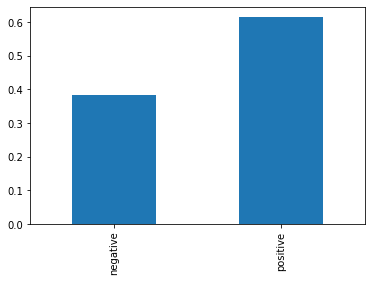

In [3586]:
df.diabetes_risk.value_counts(normalize=True).sort_index().plot.bar()

Let's take a look at age distribution (the only numerical value) of the patients/participants:


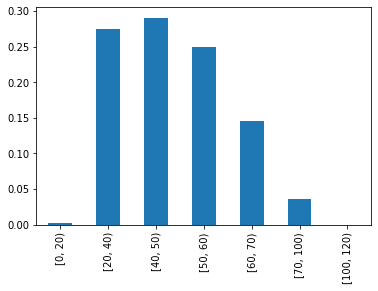

In [3587]:
bins = [0,20,40,50,60,70,100, 120]

age_groups=pd.cut(df.age, bins=bins, right=False).value_counts(normalize=True).sort_index()
age_groups.plot.bar(stacked=True)

The only numerical value is "age"

In [3588]:
numerical = ['age']

Now we verify that all categorical variables have only one of two values:

In [3589]:
categorical = [ 'alopecia', 'delayed_healing','gender', 'genital_thrush', 
               'irritability', 'itching', 'muscle_stiffness', 'obesity', 'partial_paresis',
               'polyuria', 'polyphagia', 'polydipsia', 'sudden_weight_loss',
        'visual_blurring','weakness', 
       'diabetes_risk' ]
df[categorical].nunique()

alopecia              2
delayed_healing       2
gender                2
genital_thrush        2
irritability          2
itching               2
muscle_stiffness      2
obesity               2
partial_paresis       2
polyuria              2
polyphagia            2
polydipsia            2
sudden_weight_loss    2
visual_blurring       2
weakness              2
diabetes_risk         2
dtype: int64

convert target variable to numerical (0 or 1) values

In [3590]:
#df.diabetes_risk = (df.diabetes_risk  == 'Positive').astype(int)
df.diabetes_risk = (df.diabetes_risk == 'positive').astype(int)

df.head().T

,0,1,2,3,4
age,40,58,41,45,60
gender,male,male,male,male,male
polyuria,no,no,yes,no,yes
polydipsia,yes,no,no,no,yes
sudden_weight_loss,no,no,no,yes,yes
weakness,yes,yes,yes,yes,yes
polyphagia,no,no,yes,yes,yes
genital_thrush,no,no,no,yes,no
visual_blurring,no,yes,no,no,yes
itching,yes,no,yes,yes,yes


Verify if there are any null values; we can see that for this dataset, there are none.


In [3591]:
df.isnull().sum()

age                   0
gender                0
polyuria              0
polydipsia            0
sudden_weight_loss    0
weakness              0
polyphagia            0
genital_thrush        0
visual_blurring       0
itching               0
irritability          0
delayed_healing       0
partial_paresis       0
muscle_stiffness      0
alopecia              0
obesity               0
diabetes_risk         0
dtype: int64

Verify if the values of the variables make sense (e.g., age can't be > 120 or less than zero!)

In [3592]:
df.describe ()

,age,diabetes_risk
count,520.000000,520.000000
mean,48.028846,0.615385
std,12.151466,0.486973
min,16.000000,0.000000
25%,39.000000,0.000000
50%,47.500000,1.000000
75%,57.000000,1.000000
max,90.000000,1.000000


for the target variable, get the total number of positive and negatives, as well as their normalized values

In [3593]:
df.diabetes_risk.value_counts()

1    320
0    200
Name: diabetes_risk, dtype: int64

In [3594]:
df.diabetes_risk.value_counts(normalize=True).round(2)

1    0.62
0    0.38
Name: diabetes_risk, dtype: float64

## Prepare for model creation

 The target variable we want to predict with our ML model is "diabetes_risk".

To prepare for model creation, we first split the data into four sets: df_train_full, df_train, df_val and df_test:  

**df_train_full** - 80% of the all data  
*   **df_train** - 60% of df_train_full  
*   **df_test** - 20% of df_train_full  

**df_val** - 20% of all data  

In [3595]:
from sklearn.model_selection import train_test_split

In [3596]:
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=11)
df_train, df_val = train_test_split(df_train_full, test_size=0.33, random_state=11)

Define y variables and remove target variable from dataframes

In [3597]:
y_train = df_train.diabetes_risk.values
y_val = df_val.diabetes_risk.values
y_test = df_test.diabetes_risk.values

del df_train['diabetes_risk']
del df_val['diabetes_risk']
del df_test['diabetes_risk']

Reset Index for the 3 data groups

In [3598]:
df_train.reset_index (drop=True)
df_val.reset_index (drop=True)
df_test.reset_index (drop=True)

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
0,47,male,no,yes,no,no,no,no,yes,yes,no,no,no,no,yes,yes
1,39,female,yes,yes,no,no,yes,no,yes,no,yes,yes,yes,yes,no,no
2,43,male,no,no,no,yes,no,yes,no,yes,no,yes,no,no,yes,no
3,43,male,no,no,no,yes,no,yes,no,yes,no,yes,no,no,yes,no
4,68,female,yes,yes,no,yes,yes,no,yes,yes,no,yes,yes,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,72,male,yes,no,no,no,yes,no,yes,yes,no,yes,yes,yes,yes,no
100,58,male,no,yes,no,no,no,no,yes,yes,no,no,no,yes,no,no
101,66,male,no,no,no,no,yes,no,yes,no,no,no,yes,no,yes,no
102,50,female,yes,yes,yes,yes,yes,no,no,yes,no,yes,yes,yes,no,no


In [3599]:
categorical.remove("diabetes_risk")   #exclude the predicted variable from the categories list
categorical

['alopecia',
 'delayed_healing',
 'gender',
 'genital_thrush',
 'irritability',
 'itching',
 'muscle_stiffness',
 'obesity',
 'partial_paresis',
 'polyuria',
 'polyphagia',
 'polydipsia',
 'sudden_weight_loss',
 'visual_blurring',
 'weakness']

In [3600]:
df_train

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity
304,69,female,yes,yes,yes,yes,no,no,yes,yes,yes,no,no,yes,no,yes
158,56,male,yes,no,yes,yes,no,yes,no,yes,yes,no,no,no,yes,no
7,66,male,yes,yes,yes,yes,no,no,yes,yes,yes,no,yes,yes,no,no
267,35,female,no,no,no,no,no,no,no,no,no,no,no,no,no,no
459,57,male,yes,yes,yes,yes,yes,no,yes,no,no,no,yes,no,no,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
417,39,female,yes,yes,yes,yes,yes,no,no,yes,yes,yes,yes,no,no,no
134,35,male,yes,yes,yes,yes,no,no,no,no,no,no,no,no,no,no
309,30,male,no,no,no,no,no,no,no,no,no,no,no,no,no,no
45,48,female,no,no,yes,yes,no,no,yes,yes,no,yes,yes,no,no,no


###Feature Importance

In [3601]:
global_mean = df_train_full.diabetes_risk.mean()
global_mean

0.625

In [3602]:
female_mean = df_train_full[df_train_full.gender == 'female'].diabetes_risk.mean()
print('gender == female:', round(female_mean, 3))

male_mean = df_train_full[df_train_full.gender == 'male'].diabetes_risk.mean()
print('gender == male:  ', round(male_mean, 3))

gender == female: 0.908
gender == male:   0.462


In [3603]:
female_mean / global_mean


1.4526315789473685

In [3604]:
male_mean / global_mean


0.7393939393939394

We see the ratio is > 1 for females, which means that according to this dataset, they tend to have a higher incidence of diabetes than males

In [3605]:
from IPython.display import display


In [3606]:
for col in categorical:
    df_group = df_train_full.groupby(by=col).diabetes_risk.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
alopecia,,,
no,0.717949,0.092949,1.148718
yes,0.447552,-0.177448,0.716084


,mean,diff,risk
delayed_healing,,,
no,0.614035,-0.010965,0.982456
yes,0.638298,0.013298,1.021277


,mean,diff,risk
gender,,,
female,0.907895,0.282895,1.452632
male,0.462121,-0.162879,0.739394


,mean,diff,risk
genital_thrush,,,
no,0.591331,-0.033669,0.946130
yes,0.741935,0.116935,1.187097


,mean,diff,risk
irritability,,,
no,0.539683,-0.085317,0.863492
yes,0.891089,0.266089,1.425743


,mean,diff,risk
itching,,,
no,0.626168,0.001168,1.001869
yes,0.623762,-0.001238,0.998020


,mean,diff,risk
muscle_stiffness,,,
no,0.586873,-0.038127,0.938996
yes,0.687898,0.062898,1.100637


,mean,diff,risk
obesity,,,
no,0.604651,-0.020349,0.967442
yes,0.722222,0.097222,1.155556


,mean,diff,risk
partial_paresis,,,
no,0.443983,-0.181017,0.710373
yes,0.874286,0.249286,1.398857


,mean,diff,risk
polyuria,,,
no,0.292683,-0.332317,0.468293
yes,0.947867,0.322867,1.516588


,mean,diff,risk
polyphagia,,,
no,0.475556,-0.149444,0.760889
yes,0.801047,0.176047,1.281675


,mean,diff,risk
polydipsia,,,
no,0.339207,-0.285793,0.542731
yes,0.968254,0.343254,1.549206


,mean,diff,risk
sudden_weight_loss,,,
no,0.452675,-0.172325,0.724280
yes,0.867052,0.242052,1.387283


,mean,diff,risk
visual_blurring,,,
no,0.520000,-0.105000,0.832000
yes,0.748691,0.123691,1.197906


,mean,diff,risk
weakness,,,
no,0.470588,-0.154412,0.752941
yes,0.731707,0.106707,1.170732


Calculating Mutual Information

In [3607]:
from sklearn.metrics import mutual_info_score


In [3608]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.diabetes_risk)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())

,MI
polyuria,0.259804
polydipsia,0.248104
gender,0.111192
partial_paresis,0.104567
sudden_weight_loss,0.096293


,MI
genital_thrush,0.008744
muscle_stiffness,0.005176
obesity,0.004370
delayed_healing,0.000311
itching,0.000003


Calculate Pearson's correlation for the only numerical value (age). We can see there is some positive correlation

In [3609]:
df_train_full[numerical].corrwith(df_train_full.diabetes_risk).to_frame('correlation')


,correlation
age,0.087406


In [3610]:
df_train_full.groupby(by='diabetes_risk')[numerical].mean()


,age
diabetes_risk,
0,46.615385
1,48.830769


#One Hot Encoding

In [3611]:
from sklearn.feature_extraction import DictVectorizer
train_dict = df_train[categorical + numerical].to_dict(orient='records')
train_dict[0]


{'alopecia': 'no',
 'delayed_healing': 'no',
 'gender': 'female',
 'genital_thrush': 'no',
 'irritability': 'yes',
 'itching': 'yes',
 'muscle_stiffness': 'yes',
 'obesity': 'yes',
 'partial_paresis': 'no',
 'polyuria': 'yes',
 'polyphagia': 'no',
 'polydipsia': 'yes',
 'sudden_weight_loss': 'yes',
 'visual_blurring': 'yes',
 'weakness': 'yes',
 'age': 69}

In [3612]:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

DictVectorizer(sparse=False)

In [3613]:
X_train = dv.fit_transform(train_dict)
X_train.shape


(278, 31)

In [3614]:
dv.get_feature_names ()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['age',
 'alopecia=no',
 'alopecia=yes',
 'delayed_healing=no',
 'delayed_healing=yes',
 'gender=female',
 'gender=male',
 'genital_thrush=no',
 'genital_thrush=yes',
 'irritability=no',
 'irritability=yes',
 'itching=no',
 'itching=yes',
 'muscle_stiffness=no',
 'muscle_stiffness=yes',
 'obesity=no',
 'obesity=yes',
 'partial_paresis=no',
 'partial_paresis=yes',
 'polydipsia=no',
 'polydipsia=yes',
 'polyphagia=no',
 'polyphagia=yes',
 'polyuria=no',
 'polyuria=yes',
 'sudden_weight_loss=no',
 'sudden_weight_loss=yes',
 'visual_blurring=no',
 'visual_blurring=yes',
 'weakness=no',
 'weakness=yes']

In [3615]:
val_dict = df_val[numerical+categorical].to_dict(orient='records')
X_val = dv.transform(val_dict)


#Logistic Regression

In [3616]:
from sklearn.linear_model import LogisticRegression


In [3617]:
logreg_model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=11)
logreg_model.fit(X_train, y_train)



LogisticRegression(max_iter=1000, random_state=11, solver='liblinear')

In [3618]:
y_pred = logreg_model.predict(X_val)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1])

In [3619]:
logreg_model.predict_proba(X_val)


array([[9.14573106e-01, 8.54268939e-02],
       [1.62910099e-04, 9.99837090e-01],
       [4.17951014e-03, 9.95820490e-01],
       [7.50799945e-02, 9.24920006e-01],
       [1.32740291e-01, 8.67259709e-01],
       [9.46840306e-01, 5.31596945e-02],
       [2.31039458e-04, 9.99768961e-01],
       [9.36221058e-01, 6.37789421e-02],
       [1.31477887e-01, 8.68522113e-01],
       [9.33278279e-01, 6.67217214e-02],
       [5.38410576e-01, 4.61589424e-01],
       [2.15878224e-01, 7.84121776e-01],
       [9.50279306e-01, 4.97206942e-02],
       [8.99306216e-01, 1.00693784e-01],
       [9.81506379e-01, 1.84936206e-02],
       [2.97372487e-04, 9.99702628e-01],
       [8.39549376e-04, 9.99160451e-01],
       [8.74144660e-01, 1.25855340e-01],
       [1.17159184e-01, 8.82840816e-01],
       [2.61899722e-04, 9.99738100e-01],
       [9.90347532e-01, 9.65246780e-03],
       [5.83701765e-01, 4.16298235e-01],
       [9.86677630e-01, 1.33223700e-02],
       [2.95325455e-01, 7.04674545e-01],
       [7.403181

In [3620]:
y_pred = logreg_model.predict_proba(X_val)[:, 1]
y_pred


array([0.08542689, 0.99983709, 0.99582049, 0.92492001, 0.86725971,
       0.05315969, 0.99976896, 0.06377894, 0.86852211, 0.06672172,
       0.46158942, 0.78412178, 0.04972069, 0.10069378, 0.01849362,
       0.99970263, 0.99916045, 0.12585534, 0.88284082, 0.9997381 ,
       0.00965247, 0.41629824, 0.01332237, 0.70467454, 0.2596818 ,
       0.15004233, 0.88047276, 0.99985721, 0.11410538, 0.11410538,
       0.35745327, 0.99994738, 0.74642692, 0.99986078, 0.99976286,
       0.98268355, 0.40613467, 0.99976896, 0.11410538, 0.62393877,
       0.86852211, 0.99996043, 0.11410538, 0.99515686, 0.0538715 ,
       0.07339091, 0.99048897, 0.99655441, 0.04972069, 0.06244093,
       0.99826221, 0.18541871, 0.52033062, 0.97086058, 0.9734741 ,
       0.99976286, 0.95463203, 0.11410538, 0.11410538, 0.99976896,
       0.99963502, 0.46781776, 0.99994738, 0.99983709, 0.9947553 ,
       0.08542689, 0.09243442, 0.99992674, 0.01849362, 0.09906973,
       0.08542689, 0.0071855 , 0.01227548, 0.73022808, 0.34180

In [3621]:
diabetes = y_pred > 0.5
(y_val == diabetes).mean()

0.9202898550724637

In [3622]:
y_pred = logreg_model.predict(X_val)
y_pred

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1])

##Model interpretation


In [3623]:
logreg_model.intercept_[0]


0.4748267997619319

In [3624]:
logreg_model.coef_[0]

array([-0.01750799,  0.46215701,  0.01266979,  0.31900968,  0.15581712,
        1.95084611, -1.47601931, -0.31875352,  0.79358032, -0.46214234,
        0.93696914,  0.95141775, -0.47659095,  0.55200371, -0.07717691,
        0.55195734, -0.07713054, -0.48667694,  0.96150374, -0.96489081,
        1.43971761, -0.03483098,  0.50965778, -1.47533392,  1.95016072,
        0.15380598,  0.32102082,  0.40913915,  0.06568765, -0.17990545,
        0.65473225])

In [3625]:
dict(zip(dv.get_feature_names(), logreg_model.coef_[0].round(3)))


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{'age': -0.018,
 'alopecia=no': 0.462,
 'alopecia=yes': 0.013,
 'delayed_healing=no': 0.319,
 'delayed_healing=yes': 0.156,
 'gender=female': 1.951,
 'gender=male': -1.476,
 'genital_thrush=no': -0.319,
 'genital_thrush=yes': 0.794,
 'irritability=no': -0.462,
 'irritability=yes': 0.937,
 'itching=no': 0.951,
 'itching=yes': -0.477,
 'muscle_stiffness=no': 0.552,
 'muscle_stiffness=yes': -0.077,
 'obesity=no': 0.552,
 'obesity=yes': -0.077,
 'partial_paresis=no': -0.487,
 'partial_paresis=yes': 0.962,
 'polydipsia=no': -0.965,
 'polydipsia=yes': 1.44,
 'polyphagia=no': -0.035,
 'polyphagia=yes': 0.51,
 'polyuria=no': -1.475,
 'polyuria=yes': 1.95,
 'sudden_weight_loss=no': 0.154,
 'sudden_weight_loss=yes': 0.321,
 'visual_blurring=no': 0.409,
 'visual_blurring=yes': 0.066,
 'weakness=no': -0.18,
 'weakness=yes': 0.655}

In [3626]:
# Training on full train data:
dicts_full_train = df_train_full [categorical + numerical].to_dict (orient='record')
dv=DictVectorizer(sparse=False)
X_full_train = dv.fit_transform (dicts_full_train)
y_full_train = df_train_full.diabetes_risk.values

logreg_model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=11)
logreg_model.fit(X_full_train, y_full_train)

dicts_test = df_test[categorical + numerical].to_dict(orient='records')
X_test = dv.transform(dicts_test)

y_pred = logreg_model.predict_proba(X_test)[:, 1]

diabetes = y_pred > 0.5
(y_test == diabetes).mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.
  


0.8942307692307693

In [3627]:
y_pred = logreg_model.predict(X_test)

##Using the Model

In [3628]:
patient = {
  'age': 39,
  'gender':'male',
 'polyuria':'yes',
 'polydipsia':'yes',
 'sudden_weight_loss':'yes',
 'weakness':'yes',
 'polyphagia':'yes',
 'genital_thrush':'yes',
 'visual_blurring':'yes',
 'itching':'yes',
 'irritability':'yes',
 'delayed_healing':'yes',
 'partial_paresis':'yes',
 'muscle_stiffness':'yes',
 'alopecia':'yes',
 'obesity':'yes'
}

In [3629]:
X_test = dv.transform([patient])
logreg_model.predict_proba(X_test)[0, 1]

0.9990112110074828

In [3630]:
print(list(X_test[0]))

[39.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0]


In [3631]:
patient = {
  'age': 39,
  'gender':'female',
 'polyuria':'no',
 'polydipsia':'no',
 'sudden_weight_loss':'no',
 'weakness':'no',
 'polyphagia':'no',
 'genital_thrush':'no',
 'visual_blurring':'no',
 'itching':'no',
 'irritability':'no',
 'delayed_healing':'no',
 'partial_paresis':'no',
 'muscle_stiffness':'no',
 'alopecia':'no',
 'obesity':'no'
}
X_test = dv.transform([patient])
logreg_model.predict_proba(X_test)[0, 1]

0.6124258298962492

In [3632]:
patient = {
  'age':29,
 'alopecia':'no',
 'delayed_healing':'no',
 'gender':'male',
 'genital_thrush':'no',
 'irritability':'no',
 'itching':'no',
 'muscle_stiffness':'no',
 'obesity':'no',
 'partial_paresis':'no',
 'polyuria':'no',
 'polyphagia':'no',
 'polydipsia':'no',
 'sudden_weight_loss':'no',
 'visual_blurring':'no',
 'weakness': 'no'
}
X_test = dv.transform([patient])
logreg_model.predict_proba(X_test)[0, 1]

0.07935797252978893

## Measure Performance


In [3633]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix

In [3634]:
confusion_matrix(y_test, y_pred)

array([[37,  7],
       [ 4, 56]])

In [3635]:
acc_score = accuracy_score(y_pred, y_test)
print('Accuracy score = %.3f' % acc_score)
prec_score = precision_score(y_pred, y_test)
print('Precision score = %.3f' % prec_score)
rec_score = recall_score(y_pred, y_test)
print('Recall score = %.3f' % rec_score)

Accuracy score = 0.894
Precision score = 0.933
Recall score = 0.889


#Decision Tree

In [3636]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import export_text
from sklearn import tree

In [3637]:
#train_dict = train_dict
#dv = DictVectorizer(sparse=False)
#X_train = dv.fit_transform(train_dict)
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [3638]:
y_pred = dt_model.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.9060344827586206

In [3639]:
y_pred = dt_model.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [3640]:
dt_model = DecisionTreeClassifier(max_depth=2)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [3641]:
y_pred = dt_model.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train:', auc)

y_pred = dt_model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val:', auc)

train: 0.94390589569161
val: 0.8634698275862069


In [3642]:
print(export_text(dt_model, feature_names=dv.get_feature_names()))


|--- polyuria=no <= 0.50
|   |--- age <= 66.50
|   |   |--- class: 1
|   |--- age >  66.50
|   |   |--- class: 1
|--- polyuria=no >  0.50
|   |--- gender=male <= 0.50
|   |   |--- class: 1
|   |--- gender=male >  0.50
|   |   |--- class: 0



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Plot the Decision Tree

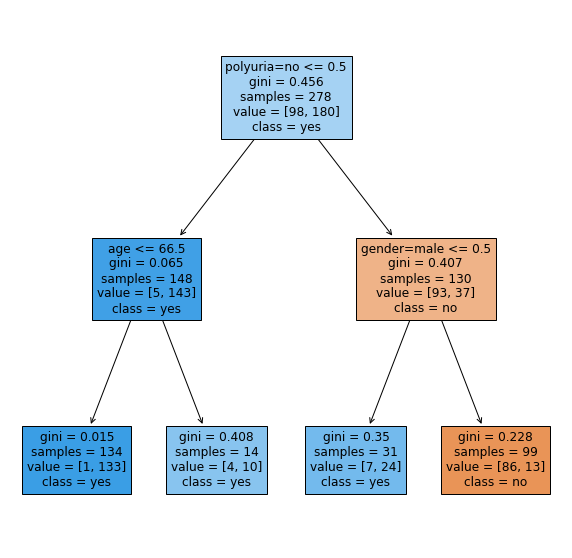

In [3643]:
fig = plt.figure (figsize=(10,10))
_ = tree.plot_tree (dt_model, feature_names=dv.get_feature_names(), class_names=["no", "yes"], filled=True)

##Random Forest

In [3644]:
from sklearn.ensemble import RandomForestClassifier

In [3645]:
dv = DictVectorizer(sparse=False)

train_dict = df_train.to_dict(orient='records')
X_train = dv.fit_transform(train_dict)

test_dicts = df_test.to_dict(orient='records')
X_test = dv.transform(test_dicts)

In [3646]:
rf_model = RandomForestClassifier(n_estimators=200,
                            max_depth=10,
                            min_samples_leaf=3,
                            random_state=1)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=3, n_estimators=200,
                       random_state=1)

In [3647]:
y_pred = rf_model.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
auc

0.9795258620689656

##XGBoost

In [3648]:
import xgboost as xgb

In [3649]:
features = dv.get_feature_names_out()
#features=numerical+categorical
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

features

array(['age', 'alopecia=no', 'alopecia=yes', 'delayed_healing=no',
       'delayed_healing=yes', 'gender=female', 'gender=male',
       'genital_thrush=no', 'genital_thrush=yes', 'irritability=no',
       'irritability=yes', 'itching=no', 'itching=yes',
       'muscle_stiffness=no', 'muscle_stiffness=yes', 'obesity=no',
       'obesity=yes', 'partial_paresis=no', 'partial_paresis=yes',
       'polydipsia=no', 'polydipsia=yes', 'polyphagia=no',
       'polyphagia=yes', 'polyuria=no', 'polyuria=yes',
       'sudden_weight_loss=no', 'sudden_weight_loss=yes',
       'visual_blurring=no', 'visual_blurring=yes', 'weakness=no',
       'weakness=yes'], dtype=object)

In [3650]:
xgb_params = {
    'eta': 0.1, 
    'max_depth': 3,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',

    'nthread': 8,
    'seed': 1,
    'verbosity': 1,
}

xgb_model = xgb.train(xgb_params, dtrain, num_boost_round=200)

In [3651]:
y_pred = xgb_model.predict(dval)
auc = roc_auc_score(y_val, y_pred)
auc

0.9780172413793103

Plot the first tree:

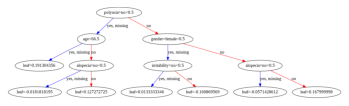

In [3652]:
xgb.plot_tree(xgb_model, num_trees=0)
plt.rcParams['figure.figsize']=[50,50]
plt.show()

In [3653]:
patient = {
  'age':29,
 'alopecia':'no',
 'delayed_healing':'no',
 'gender':'male',
 'genital_thrush':'no',
 'irritability':'no',
 'itching':'no',
 'muscle_stiffness':'no',
 'obesity':'no',
 'partial_paresis':'no',
 'polyuria':'no',
 'polyphagia':'no',
 'polydipsia':'no',
 'sudden_weight_loss':'no',
 'visual_blurring':'no',
 'weakness': 'no'
}


X = dv.transform([patient])
dX = xgb.DMatrix(X,  feature_names=features)
xgb_model.predict (dX)

array([0.01673092], dtype=float32)

##Saving the Model

In [3655]:
!pip install bentoml

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 873 kB 5.1 MB/s 
     |████████████████████████████████| 81 kB 7.6 MB/s 
     |████████████████████████████████| 56 kB 3.6 MB/s 
     |████████████████████████████████| 182 kB 51.7 MB/s 
     |████████████████████████████████| 237 kB 45.3 MB/s 
     |████████████████████████████████| 64 kB 2.3 MB/s 
     |████████████████████████████████| 46 kB 3.6 MB/s 
     |████████████████████████████████| 1.2 MB 39.3 MB/s 
     |████████████████████████████████| 50 kB 6.5 MB/s 
     |████████████████████████████████| 133 kB 66.0 MB/s 
     |████████████████████████████████| 135 kB 52.4 MB/s 
     |████████████████████████████████| 52 kB 986 kB/s 
     |████████████████████████████████| 2.1 MB 40.8 MB/s 
     |████████████████████████████████| 51 kB 5.7 MB/s 
     |████████████████████████████████| 80 kB 7.9 MB/s 
     |████████████████████████████████| 58 kB 5.

In [3656]:
import bentoml

In [3657]:
bentoml.xgboost.save_model(
    'diabetes_risk_model',
    model,
    custom_objects={
        'dictVectorizer': dv
    })

Model(tag="diabetes_risk_model:vd5jhvdbo2nigasc", path="/root/bentoml/models/diabetes_risk_model/vd5jhvdbo2nigasc/")